In [7]:
import numpy as np
from tables import open_file
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
mpl.rcParams["font.size"] = 14

In [10]:
# path = "/mnt/storage2/phd/data/thunderstorm/Aragats_2020/muon_06.26/down_muon_minus.hdf5"
path_minus = "/mnt/storage2/phd/data/thunderstorm/Aragats_2020/muon_06.26/muon_minus_uniform.hdf5"
path_plus = "/mnt/storage2/phd/data/thunderstorm/Aragats_2020/muon_06.26/muon_plus_uniform.hdf5"

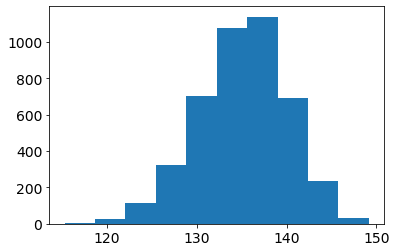

In [57]:
result = []
with open_file(path_minus) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "particle_detector")
        data =table.read()["energy"]
        plt.hist(data)
        # print(repr(table.attrs))
        # print(table.attrs["text"])
        break

In [34]:
result = []
with open_file(path_plus) as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "particle_detector")
        # print(repr(table.attrs))
        # print(table.attrs["text"])
        result.append(table.attrs["values_time"])
        

(array([200.,   0.,   0.,   0.,   3.,   3.,   4.,   5.,  81., 104.]),
 array([4.46073249e-01, 9.58945236e+01, 1.91342974e+02, 2.86791424e+02,
        3.82239875e+02, 4.77688325e+02, 5.73136775e+02, 6.68585226e+02,
        7.64033676e+02, 8.59482126e+02, 9.54930577e+02]),
 <a list of 10 Patch objects>)

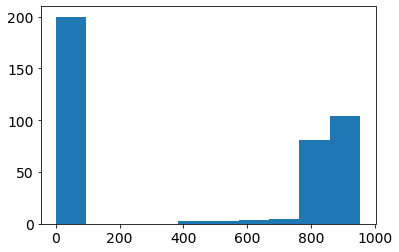

In [35]:
time = np.array(result)
plt.hist(time)

In [52]:
def get_data_by_field(path, energy):
    result = {}
    with open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector")
            temp_energy = table.attrs["values_energy"]
            field = table.attrs["values_field_z"]
            if (temp_energy == energy):
                result[field] = table.read()
    return result

def get_energy_list(path):
    result = set()
    with open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector")
            energy = table.attrs["values_energy"]
            result.add(energy)
    result = np.array(list(result))
    result.sort()
    return result

In [79]:
energy_list = get_energy_list(path_minus)

In [80]:
diff = np.diff(np.log(energy_list))

In [28]:
def calc_mean_energy(path):
    with open_file(path) as h5file:
        n = h5file.root._v_nchildren
        result = np.zeros(n,  dtype=[
            ("field", "d"),
            ("energy", "d"),
            ("mean", "d"),
            ("std", "d")
        ])
        for i, group in enumerate(h5file.root):
            if "re" in group._v_name:
                # print(group._v_name)
                continue
            table = h5file.get_node(group, "particle_detector")
            result[i]["energy"] = table.attrs["values_energy"]
            result[i]["field"] = table.attrs["values_field_z"]
            data = table.read()["energy"]/1000.0
            result[i]["mean"] = data.mean()
            result[i]["std"]= data.std()
        return result

In [44]:
def calc_mean_energy_plus(path):
    with open_file(path) as h5file:
        n = 200
        result = np.zeros(n,  dtype=[
            ("field", "d"),
            ("energy", "d"),
            ("mean", "d"),
            ("std", "d")
        ])
        count = 0
        for group in h5file.root:
            # if "re" in group._v_name:
            #     # print(group._v_name)
            #     continue
            i = count
            table = h5file.get_node(group, "particle_detector")
            if table.attrs["values_time"]<200:
                continue
            result[i]["energy"] = table.attrs["values_energy"]
            result[i]["field"] = table.attrs["values_field_z"]
            data = table.read()["energy"]/1000.0
            result[i]["mean"] = data.mean()
            result[i]["std"]= data.std()
            count +=1
        return result

In [4]:
def process(data):
    fields = np.unique(data["field"])
    result = {}
    for field in fields:
        indx = data["field"] == field
        temp = data[indx]
        result[field] = np.sort(temp, order="energy")
    return result

In [15]:
result = calc_mean_energy(path_minus)
result_dict_minus = process(result)

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [45]:
result = calc_mean_energy_plus(path_plus)
result_dict_plus = process(result)

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [66]:
def plot_diff(result_dict, particle="mu-"):
    plt.figure(figsize=(7,7))
    
    data_0 = result_dict[0.0]
    data_200 = result_dict[200.0]
    
    plt.subplot(211)
    for key, value in result_dict.items():
        plt.errorbar(value["energy"], (value["mean"]-value["energy"])*1000, yerr=value["std"], label="{} kV/cm".format(key/100.0))
    plt.xlim((data_0["energy"][0]*0.9, data_0["energy"][-1]*1.1))
    plt.grid(True)
    plt.ylabel("Differences with\n init energy, MeV")
    plt.xlabel("Init energy, GeV")
    plt.xscale("log")
    plt.legend()
    plt.tight_layout()
    plt.subplot(414)
    data_0 = result_dict[0.0]
    data_200 = result_dict[200.0]
    plt.plot(data_0["energy"], (data_0["mean"] - data_200["mean"])*1000)
    plt.ylabel("Differences\n 0 and 2 kV/cm, MeV")
    plt.xlabel("Init energy, GeV")
    plt.xscale("log")
    plt.xlim((data_0["energy"][0]*0.9, data_0["energy"][-1]*1.1))
    if particle == "mu-":
        sign = -1
    else:
        sign= 1
    plt.hlines(sign*200, data_0["energy"].min(), data_0["energy"].max(), linestyles="dashed")
    plt.tight_layout()
    plt.savefig("diff_{}.png".format(particle), format="png", transparent = True, dpi=600)

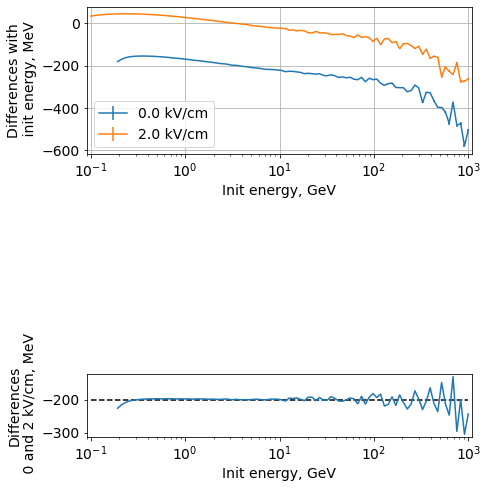

In [106]:
plot_diff(result_dict_minus)

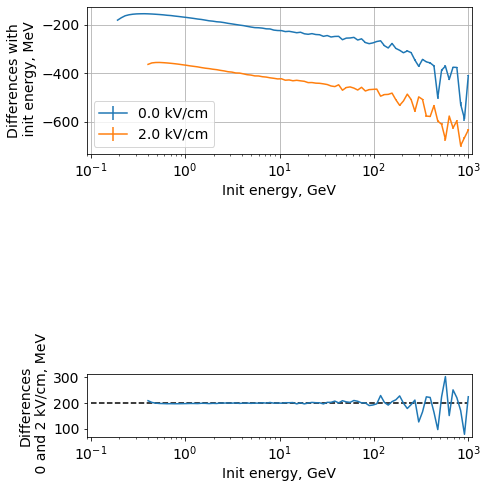

In [107]:
plot_diff(result_dict_plus, particle="mu+")

In [86]:
def calc_energy_shift(path, plus=False):
    with open_file(path) as h5file:
        
        count = 0
        energy_list = get_energy_list(path_minus)
        max_ = max(energy_list)
        min_ = min(energy_list)
        for group in h5file.root:
            # if "re" in group._v_name:
            #     # print(group._v_name)
            #     continue
            i = count
            table = h5file.get_node(group, "particle_detector")
            if plus:
                if table.attrs["values_time"]<200:
                    continue
            data = table.read()["energy"]/1000.0
            if data.size !=0:
                if data.max() > max_:
                    max_ = data.max()
                if data.min() < min_:
                    min_ = data.min()
            count +=1
        
        step = np.diff(np.log(energy_list))[0]
        min_ = np.log(min_)
        max_ = np.log(max_)
        bins = np.arange(min_, max_+step/2, step)
        bins = np.exp(bins)
        # 
        # bins = np.zeros(energy_list.size+1, "d")
        # bins[0] = energy_list[0] - energy_list[0]/2
        # bins[-1] = energy_list[-1] + energy_list[1]/2
        # bins[1:-1] = energy_list[:-1] + np.diff(energy_list)/2
        
        n = 200
        result = np.zeros(n,  dtype=[
            ("field", "d"),
            ("energy", "d"),
            ("hist", "d", bins.size - 1)
        ])

        count = 0
        for group in h5file.root:
            # if "re" in group._v_name:
            #     # print(group._v_name)
            #     continue
            i = count
            table = h5file.get_node(group, "particle_detector")
            if plus:
                if table.attrs["values_time"]<200:
                    continue
            result[i]["energy"] = table.attrs["values_energy"]
            result[i]["field"] = table.attrs["values_field_z"]
            data = table.read()["energy"]/1000.0
            hist, bins = np.histogram(data, bins=bins)
            result[i]["hist"] = hist
            count +=1
        return result, bins

In [87]:
result, bins = calc_energy_shift(path_minus)
result_munis_shift = process(result)



In [103]:
def plot_shift(result_shift, bins, particle="mu-"):
    shift_0 = result_shift[0.0]["hist"].sum(axis=0)
    shift_200 = result_shift[200.0]["hist"].sum(axis=0)
    plt.figure(figsize=(7,7))
    plt.step(energy_list, np.ones(energy_list.size), label="Init")
    plt.step(bins[:-1], shift_0/10000, label="0.0 kV/cm")
    plt.step(bins[:-1], shift_200/10000, label="2.0 kV/cm")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True)
    plt.xlabel("Energy, GeV")
    plt.ylabel("Muon")
    plt.legend(loc=4)
    plt.tight_layout()
    plt.savefig("shift_{}.png".format(particle), format="png", transparent = True, dpi=600)

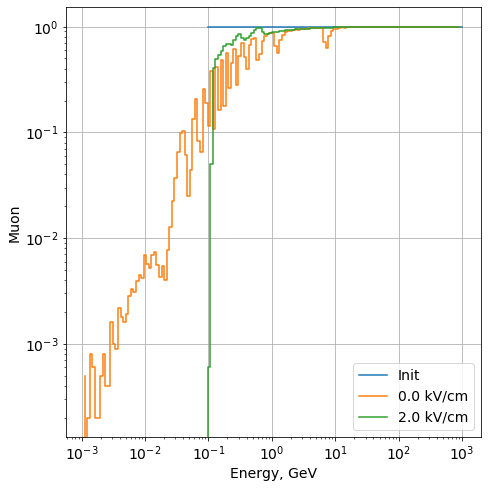

In [104]:
plot_shift(result_munis_shift, bins, particle="mu-")

In [99]:
result, bins_plus = calc_energy_shift(path_plus, plus=True)
result_plus_shift = process(result)



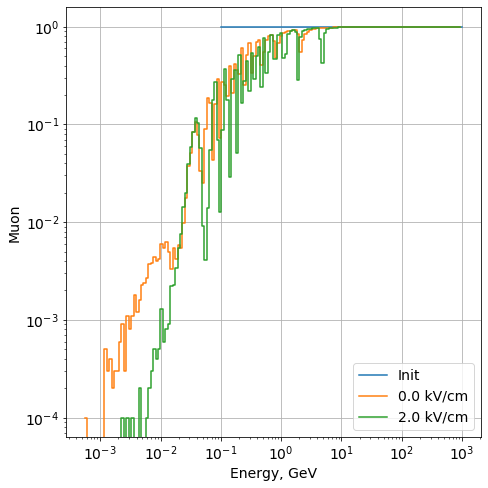

In [105]:
plot_shift(result_plus_shift, bins_plus, particle="mu+")
